In [1]:
import pandas as pd
import numpy as np 

In [2]:
# Load datasets
minute_calories = pd.read_csv('minuteCaloriesNarrow_merged.csv')
minute_intensities = pd.read_csv('minuteIntensitiesNarrow_merged.csv')
minute_mets = pd.read_csv('minuteMETsNarrow_merged.csv')
minute_steps = pd.read_csv('minuteStepsNarrow_merged.csv')

In [3]:
print(minute_calories.shape)
print(minute_intensities.shape)
print(minute_mets.shape)
print(minute_steps.shape)

(1325580, 3)
(1325580, 3)
(1325580, 3)
(1325580, 3)


In [4]:
# Inspect the first few rows and the column names of each dataset
datasets = [minute_calories, minute_intensities, minute_mets, minute_steps]
dataset_names = ['minute_calories', 'minute_intensities', 'minute_mets', 'minute_steps']

for name, dataset in zip(dataset_names, datasets):
    print(f"{name.upper()}:")
    print(dataset.head())
    print(dataset.columns.tolist())
    print("\n")

MINUTE_CALORIES:
           Id         ActivityMinute  Calories
0  1503960366  4/12/2016 12:00:00 AM    0.7865
1  1503960366  4/12/2016 12:01:00 AM    0.7865
2  1503960366  4/12/2016 12:02:00 AM    0.7865
3  1503960366  4/12/2016 12:03:00 AM    0.7865
4  1503960366  4/12/2016 12:04:00 AM    0.7865
['Id', 'ActivityMinute', 'Calories']


MINUTE_INTENSITIES:
           Id         ActivityMinute  Intensity
0  1503960366  4/12/2016 12:00:00 AM          0
1  1503960366  4/12/2016 12:01:00 AM          0
2  1503960366  4/12/2016 12:02:00 AM          0
3  1503960366  4/12/2016 12:03:00 AM          0
4  1503960366  4/12/2016 12:04:00 AM          0
['Id', 'ActivityMinute', 'Intensity']


MINUTE_METS:
           Id         ActivityMinute  METs
0  1503960366  4/12/2016 12:00:00 AM    10
1  1503960366  4/12/2016 12:01:00 AM    10
2  1503960366  4/12/2016 12:02:00 AM    10
3  1503960366  4/12/2016 12:03:00 AM    10
4  1503960366  4/12/2016 12:04:00 AM    10
['Id', 'ActivityMinute', 'METs']


MINUTE_S

In [5]:
# Merge datasets: Start with minutely_calories as the base, then merge others one by one
# Using an outer join to ensure no data is missed
minute_merged_data_narrow = minute_calories.merge(minute_intensities, on=['Id', 'ActivityMinute'], how='outer', suffixes=('', '_intensities'))

# Merging minutely_mets
minute_merged_data_narrow = minute_merged_data_narrow.merge(minute_mets, on=['Id', 'ActivityMinute'], how='outer', suffixes=('', '_mets'))

# Merging minutely_steps
minute_merged_data_narrow = minute_merged_data_narrow.merge(minute_steps, on=['Id', 'ActivityMinute'], how='outer', suffixes=('', '_steps'))

# Check for duplicates based on Id and ActivityDay
duplicates = minute_merged_data_narrow.duplicated(subset=['Id', 'ActivityMinute'], keep='first').sum()

# Overview of the merged dataset
merged_overview = {
    'Number of rows': minute_merged_data_narrow.shape[0],
    'Number of columns': minute_merged_data_narrow.shape[1],
    'Number of duplicates': duplicates
}

print(merged_overview)
minute_merged_data_narrow.head()

{'Number of rows': 1325580, 'Number of columns': 6, 'Number of duplicates': 0}


,Id,ActivityMinute,Calories,Intensity,METs,Steps
0,1503960366,4/12/2016 12:00:00 AM,0.7865,0,10,0
1,1503960366,4/12/2016 12:01:00 AM,0.7865,0,10,0
2,1503960366,4/12/2016 12:02:00 AM,0.7865,0,10,0
3,1503960366,4/12/2016 12:03:00 AM,0.7865,0,10,0
4,1503960366,4/12/2016 12:04:00 AM,0.7865,0,10,0


In [6]:
# Define a function to split the ActivityHour column into ActivityDay and ActivityTime
def split_activity_minute(df, column_name='ActivityMinute'):
    # Split the column into two parts: Date and Time
    split_columns = df[column_name].str.split(' ', expand=True)
    # Assign the split columns to the dataframe
    df['ActivityDay'] = pd.to_datetime(split_columns[0])  # Convert to datetime format
    df['ActivityTime'] = split_columns[1]
    # Drop the original ActivityHour column
    df.drop(column_name, axis=1, inplace=True)
    return df

In [7]:
# Apply the function to each dataset
minute_merged_data_narrow = split_activity_minute(minute_merged_data_narrow)

In [8]:
minute_merged_data_narrow.head()

,Id,Calories,Intensity,METs,Steps,ActivityDay,ActivityTime
0,1503960366,0.7865,0,10,0,2016-04-12,12:00:00
1,1503960366,0.7865,0,10,0,2016-04-12,12:01:00
2,1503960366,0.7865,0,10,0,2016-04-12,12:02:00
3,1503960366,0.7865,0,10,0,2016-04-12,12:03:00
4,1503960366,0.7865,0,10,0,2016-04-12,12:04:00


In [9]:
minute_merged_data_narrow.to_csv("minute_merged_data_narrow.csv")

In [10]:
minute_merged_data_narrow.shape

(1325580, 7)

In [11]:
minute_merged_data_narrow.isnull().sum()

Id              0
Calories        0
Intensity       0
METs            0
Steps           0
ActivityDay     0
ActivityTime    0
dtype: int64

In [12]:
minute_merged_data_narrow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1325580 entries, 0 to 1325579
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   Id            1325580 non-null  int64         
 1   Calories      1325580 non-null  float64       
 2   Intensity     1325580 non-null  int64         
 3   METs          1325580 non-null  int64         
 4   Steps         1325580 non-null  int64         
 5   ActivityDay   1325580 non-null  datetime64[ns]
 6   ActivityTime  1325580 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 80.9+ MB


In [ ]:
#Exploratory Data Analysis

In [13]:
#1. Load The Dataset
minute_activity_narrow_EDA = pd.read_csv("minute_merged_data_narrow.csv", index_col=0)

In [14]:
# Display the first few rows
print(minute_activity_narrow_EDA.head())

# Get a concise summary of the dataframe
minute_activity_narrow_EDA.info()

           Id  Calories  Intensity  METs  Steps ActivityDay ActivityTime
0  1503960366    0.7865          0    10      0  2016-04-12     12:00:00
1  1503960366    0.7865          0    10      0  2016-04-12     12:01:00
2  1503960366    0.7865          0    10      0  2016-04-12     12:02:00
3  1503960366    0.7865          0    10      0  2016-04-12     12:03:00
4  1503960366    0.7865          0    10      0  2016-04-12     12:04:00
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1325580 entries, 0 to 1325579
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Id            1325580 non-null  int64  
 1   Calories      1325580 non-null  float64
 2   Intensity     1325580 non-null  int64  
 3   METs          1325580 non-null  int64  
 4   Steps         1325580 non-null  int64  
 5   ActivityDay   1325580 non-null  object 
 6   ActivityTime  1325580 non-null  object 
dtypes: float64(1), int64(4), object(2)
memor

In [15]:
print(minute_activity_narrow_EDA.describe())

                 Id      Calories     Intensity          METs         Steps
count  1.325580e+06  1.325580e+06  1.325580e+06  1.325580e+06  1.325580e+06
mean   4.847898e+09  1.623130e+00  2.005937e-01  1.469001e+01  5.336192e+00
std    2.422313e+09  1.410447e+00  5.190227e-01  1.205541e+01  1.812830e+01
min    1.503960e+09  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
25%    2.320127e+09  9.357000e-01  0.000000e+00  1.000000e+01  0.000000e+00
50%    4.445115e+09  1.217600e+00  0.000000e+00  1.000000e+01  0.000000e+00
75%    6.962181e+09  1.432700e+00  0.000000e+00  1.100000e+01  0.000000e+00
max    8.877689e+09  1.974995e+01  3.000000e+00  1.570000e+02  2.200000e+02


In [16]:
print(minute_activity_narrow_EDA.isnull().sum())

Id              0
Calories        0
Intensity       0
METs            0
Steps           0
ActivityDay     0
ActivityTime    0
dtype: int64


In [17]:
#Visualization

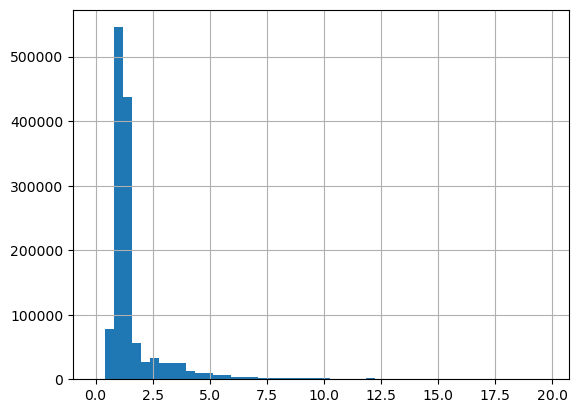

In [18]:
#1.Histogram
import matplotlib.pyplot as plt

minute_activity_narrow_EDA['Calories'].hist(bins=50)
plt.show()

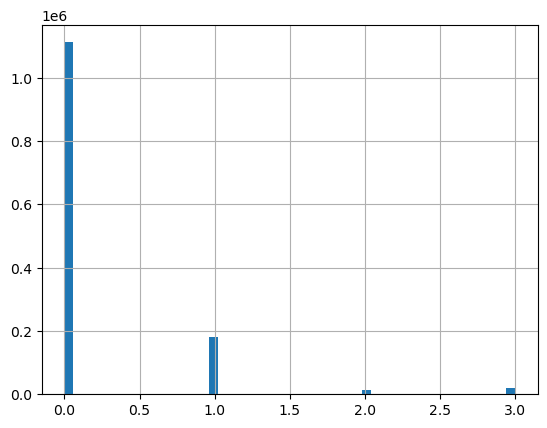

In [19]:
minute_activity_narrow_EDA['Intensity'].hist(bins=50)
plt.show()

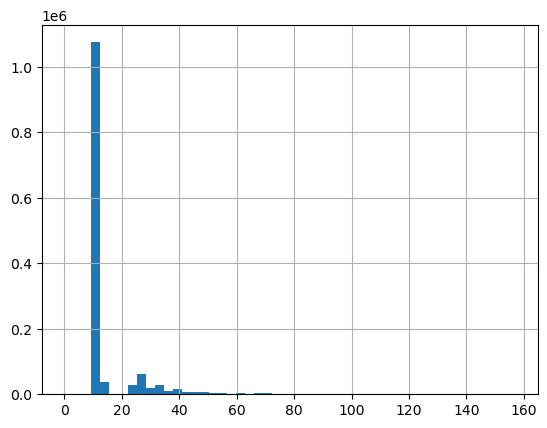

In [20]:
minute_activity_narrow_EDA['METs'].hist(bins=50)
plt.show()

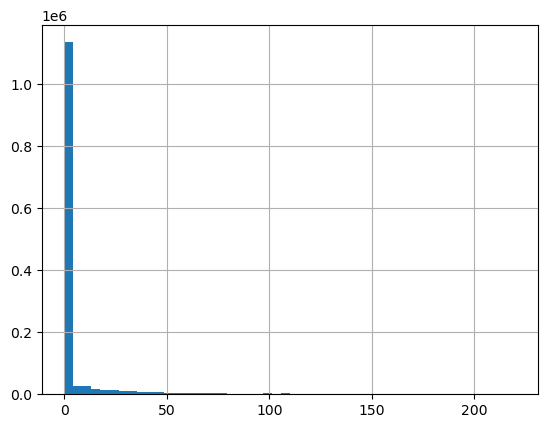

In [21]:
minute_activity_narrow_EDA['Steps'].hist(bins=50)
plt.show()

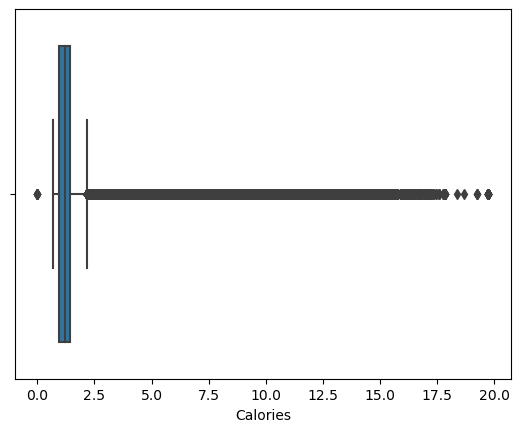

In [22]:
# Box Plot
import seaborn as sns

sns.boxplot(x=minute_activity_narrow_EDA['Calories'])
plt.show()

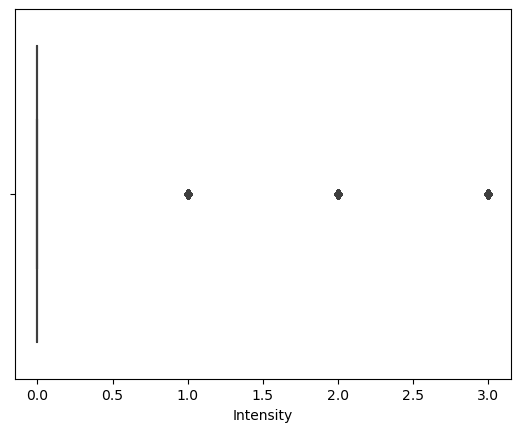

In [23]:
sns.boxplot(x=minute_activity_narrow_EDA['Intensity'])
plt.show()

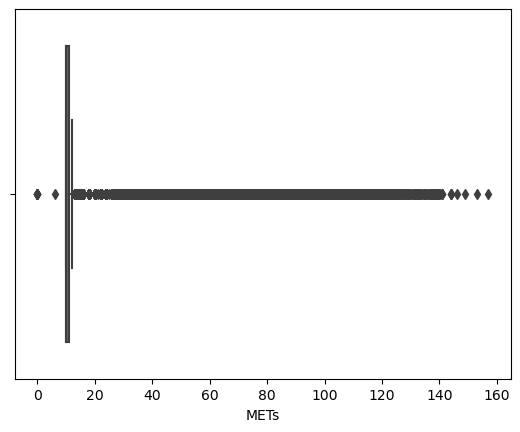

In [24]:
sns.boxplot(x=minute_activity_narrow_EDA['METs'])
plt.show()

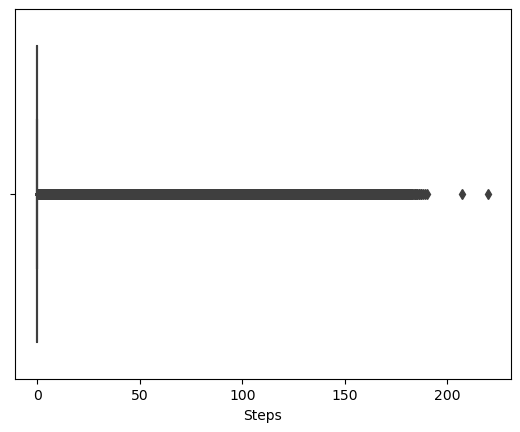

In [25]:
sns.boxplot(x=minute_activity_narrow_EDA['Steps'])
plt.show()

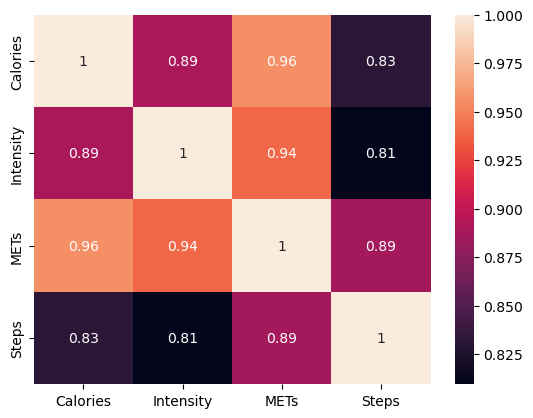

In [26]:
numeric_columns = ['Calories','Intensity','METs','Steps']
correlation_matrix = minute_activity_narrow_EDA[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

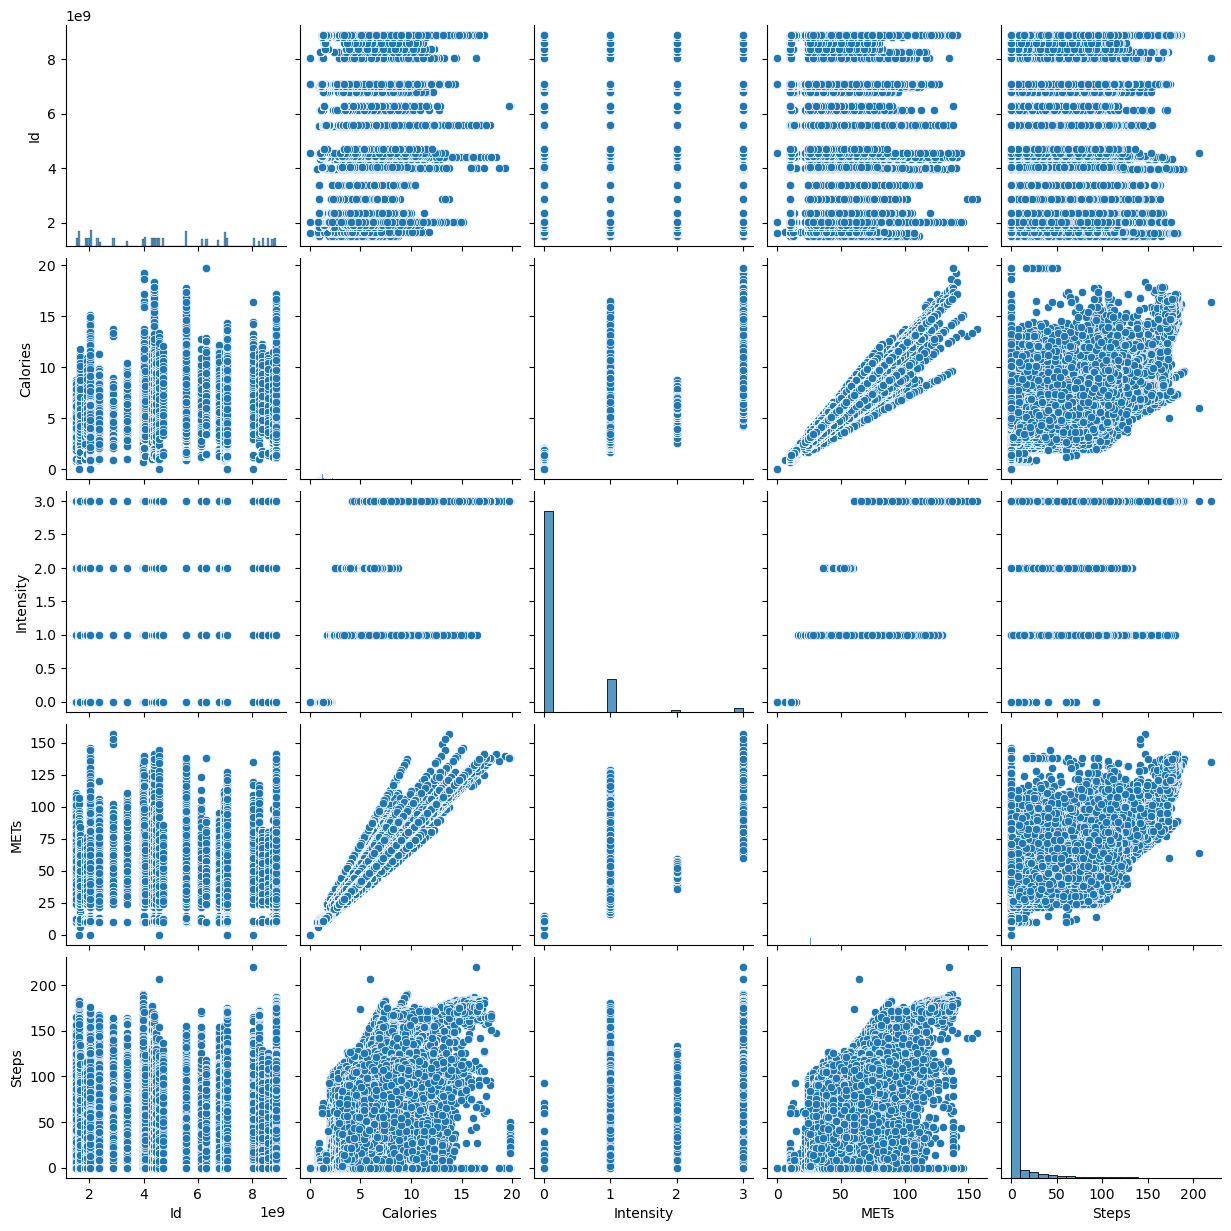

In [35]:
sns.pairplot(minute_activity_narrow_EDA)

In [34]:
plt.show()

In [29]:
# Documentation

##1. Exploratory Data Analysis Report:
Histograms:
The majority of recorded activities are of modest magnitude, as indicated by the large concentration of data in the lower end of the histograms for all measures. Higher activity levels are present, despite the lengthy tails suggesting that they are rare.
Box Plot:
A narrow interquartile range is displayed in the box plots for steps, calories, intensity, METs, and steps, suggesting that the majority of the data is centered around a lower median value. Outliers indicate that there may be some very high value cases, but they are the exception rather than the rule.
Heatmap:
All of the variable pairs in the heatmap exhibit strong correlations, with coefficients ranging from 0.81 to 0.96.

Calories and METs had the strongest association (0.96), which makes sense given that METs is a measure of energy expenditure (calories burned).

The METs value rises in tandem with increased workout intensity, indicating increased energy expenditure, according to a strong connection between METs and intensity (0.94).

Steps are an excellent, although not ideal, proxy for the total activity level, as evidenced by their slightly weaker but still significant relationships with other variables.

Pairplot:
Strong correlations seen in the heatmap are confirmed by the scatter plots on the pairplot, which clearly display positive trends between the variables.

Calories, Intensity, METs, and Steps all seem to have linear correlations with one another, indicating that increases in one measure are always accompanied by increases in the others.

At the bottom end of the plots, there is an obvious pattern of dense clustering, suggesting that a significant amount of the data comprises low activity levels.

Plots also demonstrate some data distribution, however less frequently, at greater activity levels.

2. Customer Segmentation Analysis:
Low-Intensity Users: A subset of users who engage in low-intensity exercise is indicated by the thick clusters at the bottom of the plots. These users may concentrate on low-impact exercises like walking.

Users Who Are Moderately Active: Users who are moderately active are those who fall within the middle range of the plots. On sometimes, they may engage in harder activities.

High-Intensity Users: A smaller subset of high-intensity users is represented by the data points that are scattered at the higher end. These might be people who play sports or engage in intense activity on a regular basis.

3. Implications for Customers Report:
Customizable Goals: Considering that the data indicates differing degrees of activity, having goals that can be altered to suit various user groups may be beneficial.

Activity Tracking: Users should be encouraged to monitor their development over time. Information such as this could assist users in understanding the relationship between steps taken and intensity in relation to total steps taken and calories burned (METs).

Education on METs and Intensity: Considering the close relationship between METs and intensity, providing users with information on the meaning of these terms may aid them in better organizing their exercise regimens.

4. Marketing Strategy Recommendations:
Diverse User Engagement: Marketing can be customized to interact with users according on their degree of activity. For instance, guidance aimed at encouraging users in the low-intensity sector to progressively improve their activity levels could be given.

Community Challenges: Putting in place community challenges that accommodate varying degrees of difficulty could increase participation in all sectors.

Data-Driven Personalization: Provide users with benchmarks and individualized insights based on their usage of the data to help them set and meet reasonable fitness objectives.

Product Development: By understanding the relationship between these variables, new features that offer more detailed information on users' fitness and health can be developed.

Conclusion:
The user base has a wide range of activity levels, according to the data.

An wide relationship between activity-related data indicates that integrated measurements may offer thorough understanding of a user's fitness.

In order to engage consumers at all activity levels, marketing and product strategies should make use of these data.

A particular emphasis should be placed on enhancing overall activity and retention through tailored experiences and community elements.
